In [2]:
import pandas as pd
import seaborn as sns
fpath = 'Hotel_Occupancy_Tax_Receipts__Monthly.csv'
df = pd.read_csv(fpath)

In [3]:
df.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,...,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,155,...,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178.0,1,$6010.00,$6010.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,156,...,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178.0,1,$9855.00,$9855.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,194,...,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178.0,1,$9425.00,$9425.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


In [8]:
dataframe['Location Tot Room Receipts'] = dataframe['Location Tot Room Receipts'].replace('[\$,]','',regex=True).astype(float,inplace=True)

In [7]:
from copy import deepcopy
dataframe = deepcopy(df)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17975 non-null float64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot

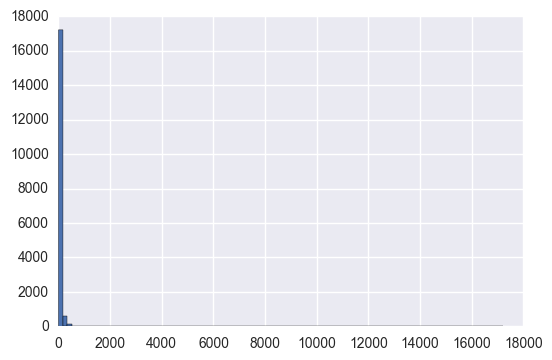

In [12]:
dataframe['Location Room Capacity'].hist(bins=100)

In [11]:
%matplotlib inline

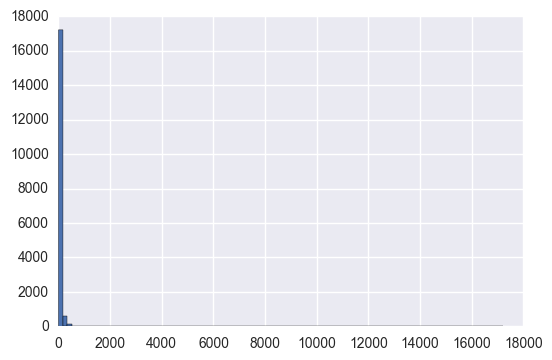

In [13]:
rows_of_interest = (dataframe['Location Room Capacity'] < 50)
dataframe['Location Room Capacity'].hist(bins=100)

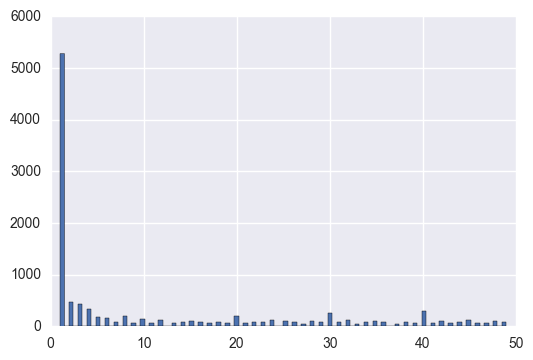

In [15]:
rows_of_interest = (dataframe['Location Room Capacity'] < 50)
dataframe['Location Room Capacity'][rows_of_interest].hist(bins=100)

In [16]:
(dataframe['Location Room Capacity'] == 1).sum()

5276

In [17]:
texas_df = dataframe[dataframe['Location State']=='TX']

In [20]:
texas_df['Location City'].describe()

count            17975
unique             696
top       PORT ARANSAS
freq              1476
Name: Location City, dtype: object

In [21]:
city_counts = texas_df.groupby('Location City')['Taxpayer Number'].nunique()

In [24]:
top_cities = city_counts > 50

In [23]:
city_counts.sort_values(axis=0, ascending=False, inplace=True)

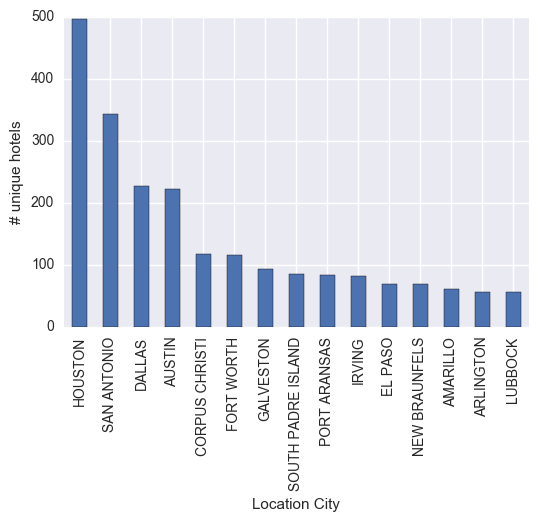

In [25]:
city_counts[top_cities].plot(kind='bar').set_ylabel('# unique hotels')